<a href="https://colab.research.google.com/github/nedlecky/CSC485B/blob/main/CSC485_112_ThermocoupleMLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# CSC 485B Spring 2023
## Other techniques for the thermocouple conversion!
## It wasn't too linear.

In [1]:
import numpy as np

# Voltage(mV) , Temperature(F)
x = np.array([0,300,500,1000,1500,1700,2000,2500,3000,3300,3500,4000,4500,5000,5300,5500,5900,6000], dtype='f')
y = np.array([32.0,122.4,176.0,296.4,405.7,447.6,509.0,608.4,704.7,761.4,799.0,891.9,983.0,1072.6,1125.7,1160.8,1230.3,1247.5])

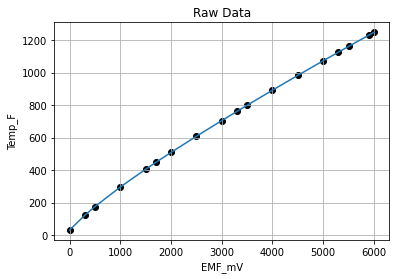

In [2]:
# Let's take a look at the sample data
import matplotlib.pyplot as plt

plt.scatter(x,y, color='black')
plt.plot(x,y)

plt.title('Raw Data')
plt.xlabel('EMF_mV')
plt.ylabel('Temp_F')
plt.grid()
plt.show()


In [3]:
# For n inputs and m outputs with N examples... (Note here n=m=1 and N=2)
# We need X to be an Nxn matrix and Y to be an Nxm matrix
n=1 # 1 input
m=1 # 1 output
N = x.shape[0]
X = x.reshape(N,n)
Y = y.reshape(N,m)
print(f"N={N} n={n} m={m}")


N=18 n=1 m=1


Mean squared error: 286.57
Mean absolute error: 14.00
Mean absolute percentage error: 0.04
        deltaT_F
count  18.000000
mean   -0.000016
std    17.419017
min   -18.790274
25%   -14.965742
50%    -2.923270
75%     9.211762
max    40.911598


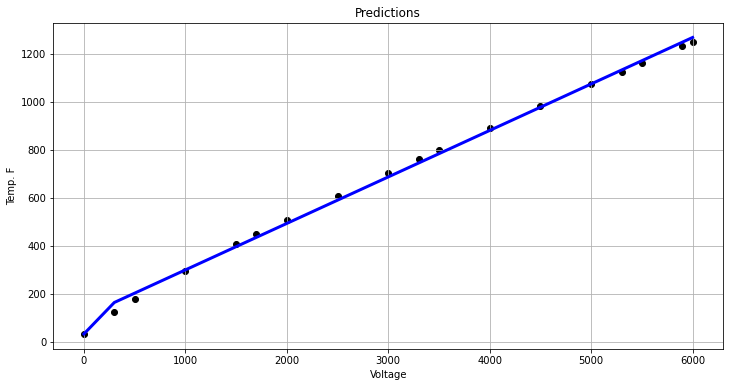

In [19]:
#MLP
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import pandas as pd

def try_MLP(X_in, title="Predictions"):
  # Just take these out and drop in MLPRegressor!
  global regr
  #regr = linear_model.LinearRegression()
  #regr.fit(X_in, Y)
  #regr = DecisionTreeRegressor(max_depth=try_max_depth)
  #regr.fit(X_in, Y)
  regr = MLPRegressor(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(5,2), random_state=1)
  regr.fit(X_in, Y.reshape(N,)) # MLP doesn't like Y as a column vector

  # Add the reshape since decision tree outputs 18,1 otherwise
  Y_pred = regr.predict(X_in).reshape(N,1)
  print(f"Mean squared error: {mean_squared_error(Y, Y_pred):.2f}")
  print(f"Mean absolute error: {mean_absolute_error(Y, Y_pred):.2f}")
  print(f"Mean absolute percentage error: {mean_absolute_percentage_error(Y, Y_pred):.2f}")

  # Put error in pandas so we can use .describe()
  e = pd.DataFrame(Y_pred-Y, columns=['deltaT_F'])
  print(e.describe())
  # Probably not very good performance!

  # Plot original and predicted
  plt.figure(figsize=(12,6))
  plt.scatter(X, Y, color="black")
  plt.plot(X, Y_pred, color="blue", linewidth=3)
  plt.title(title)
  plt.xlabel('Voltage')
  plt.ylabel('Temp. F')
  plt.grid()
  plt.show()

try_MLP(X)


[[0.0000000e+00 0.0000000e+00]
 [3.0000000e+02 5.0000001e-02]
 [5.0000000e+02 8.3333336e-02]
 [1.0000000e+03 1.6666667e-01]
 [1.5000000e+03 2.5000000e-01]
 [1.7000000e+03 2.8333333e-01]
 [2.0000000e+03 3.3333334e-01]
 [2.5000000e+03 4.1666666e-01]
 [3.0000000e+03 5.0000000e-01]
 [3.3000000e+03 5.5000001e-01]
 [3.5000000e+03 5.8333331e-01]
 [4.0000000e+03 6.6666669e-01]
 [4.5000000e+03 7.5000000e-01]
 [5.0000000e+03 8.3333331e-01]
 [5.3000000e+03 8.8333333e-01]
 [5.5000000e+03 9.1666669e-01]
 [5.9000000e+03 9.8333335e-01]
 [6.0000000e+03 1.0000000e+00]]
Mean squared error: 526.05
Mean absolute error: 19.65
Mean absolute percentage error: 0.14
        deltaT_F
count  18.000000
mean    0.000002
std    23.600665
min   -24.787339
25%   -19.883253
50%    -6.816565
75%    13.908007
max    58.905079


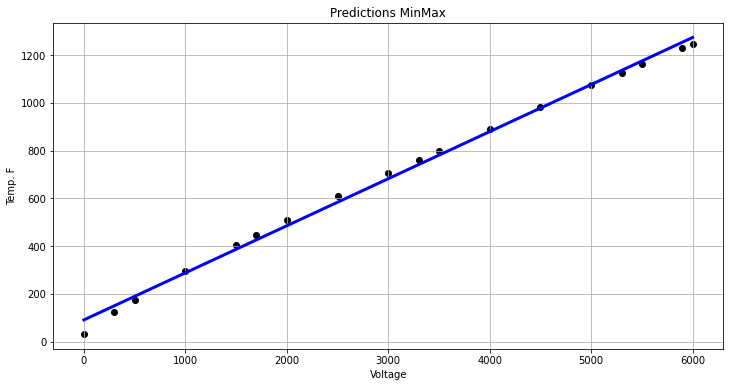

In [20]:
# MLP with MinMax Scaler

from sklearn import preprocessing

minmax_scaler = preprocessing.MinMaxScaler()
x_minmax = minmax_scaler.fit_transform(X)
X_minmax = minmax_scaler.transform(X)
print(np.hstack([X,X_minmax]))
try_MLP(X_minmax, title="Predictions MinMax")
# This seems to degenerate to LinearRegression!



[[ 0.00000000e+00 -1.58467329e+00]
 [ 3.00000000e+02 -1.43048882e+00]
 [ 5.00000000e+02 -1.32769918e+00]
 [ 1.00000000e+03 -1.07072508e+00]
 [ 1.50000000e+03 -8.13751161e-01]
 [ 1.70000000e+03 -7.10961521e-01]
 [ 2.00000000e+03 -5.56777120e-01]
 [ 2.50000000e+03 -2.99803048e-01]
 [ 3.00000000e+03 -4.28290069e-02]
 [ 3.30000000e+03  1.11355424e-01]
 [ 3.50000000e+03  2.14145035e-01]
 [ 4.00000000e+03  4.71119106e-01]
 [ 4.50000000e+03  7.28093088e-01]
 [ 5.00000000e+03  9.85067129e-01]
 [ 5.30000000e+03  1.13925159e+00]
 [ 5.50000000e+03  1.24204123e+00]
 [ 5.90000000e+03  1.44762051e+00]
 [ 6.00000000e+03  1.49901533e+00]]
Mean squared error: 10.03
Mean absolute error: 2.62
Mean absolute percentage error: 0.02
        deltaT_F
count  18.000000
mean   -0.000006
std     3.258932
min    -6.181134
25%    -1.767763
50%    -0.367826
75%     1.919021
max     6.630035


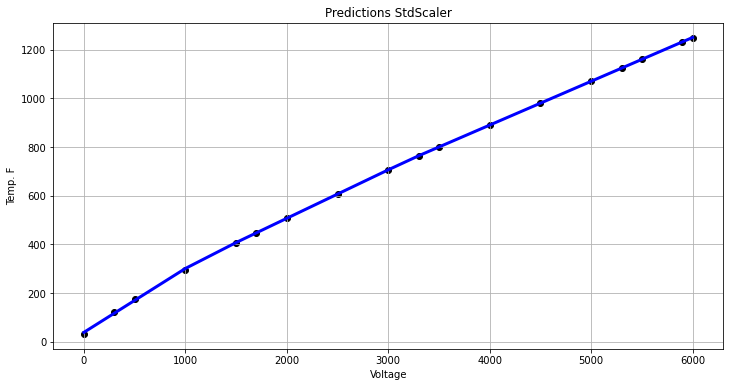

In [21]:
# MLP with Std Scaler

from sklearn import preprocessing

std_scaler = preprocessing.StandardScaler()
x_standard = std_scaler.fit_transform(X)
X_std = std_scaler.transform(X)
print(np.hstack([X,X_std]))
try_MLP(X_std, title="Predictions StdScaler")


Mean squared error: 590.76
Mean absolute error: 9.75
Mean absolute percentage error: 0.16
        deltaT_F
count  18.000000
mean    0.000312
std    25.010135
min   -65.866006
25%    -1.347543
50%    -0.127274
75%     1.203915
max    78.133994


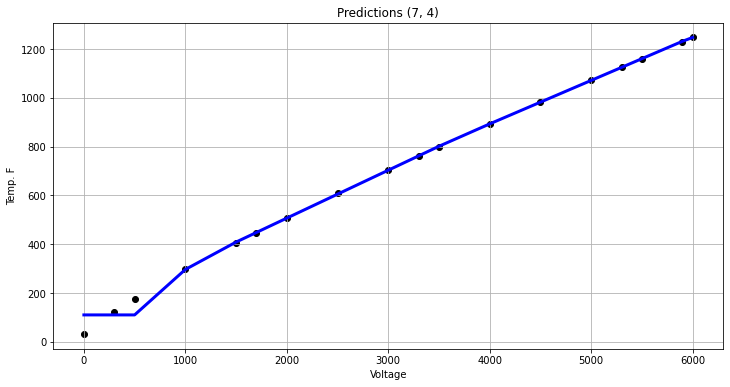

Mean squared error: 0.27
Mean absolute error: 0.44
Mean absolute percentage error: 0.00
        deltaT_F
count  18.000000
mean    0.019956
std     0.531374
min    -0.759697
25%    -0.483510
50%     0.051618
75%     0.398594
max     0.933564


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


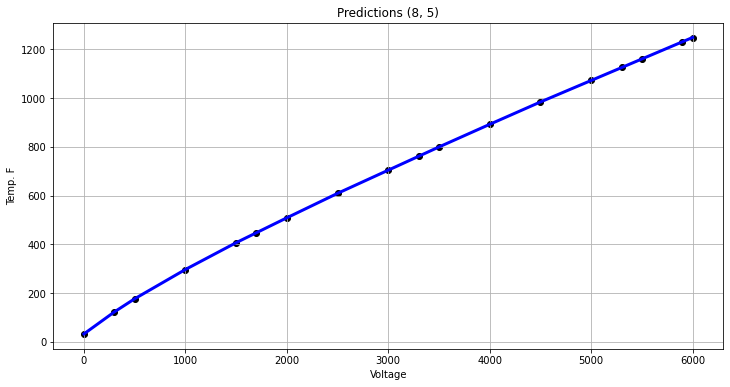

Mean squared error: 581.58
Mean absolute error: 17.88
Mean absolute percentage error: 0.17
        deltaT_F
count  18.000000
mean    4.336219
std    24.410634
min   -18.260466
25%   -14.456193
50%    -2.069251
75%    16.051680
max    73.742568


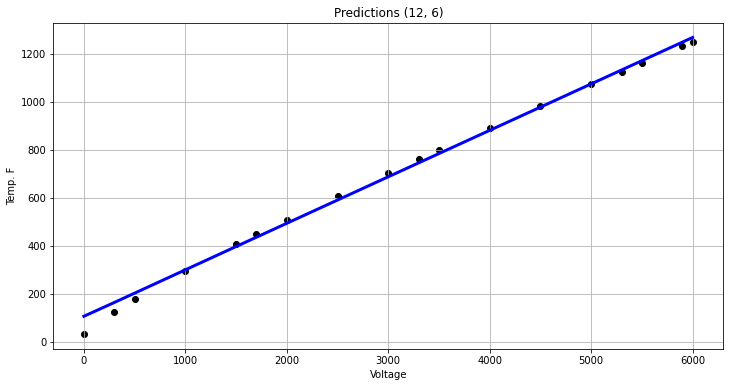

Mean squared error: 2.87
Mean absolute error: 1.37
Mean absolute percentage error: 0.00
        deltaT_F
count  18.000000
mean   -0.000026
std     1.741978
min    -2.751842
25%    -1.570272
50%    -0.000266
75%     1.587719
max     2.864538


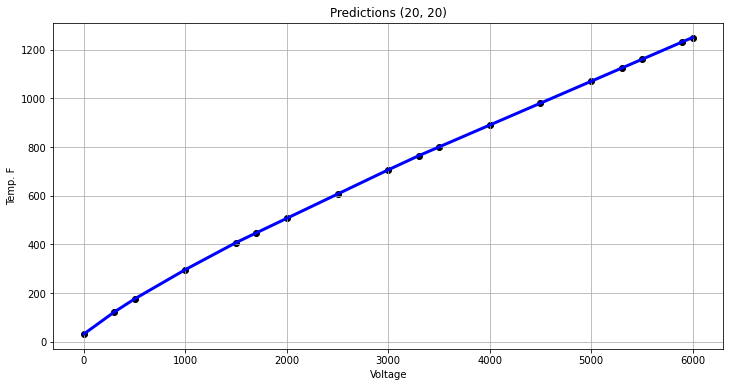

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


Mean squared error: 0.80
Mean absolute error: 0.65
Mean absolute percentage error: 0.00
        deltaT_F
count  18.000000
mean   -0.009140
std     0.919979
min    -2.613628
25%    -0.463840
50%    -0.027924
75%     0.561436
max     1.509845


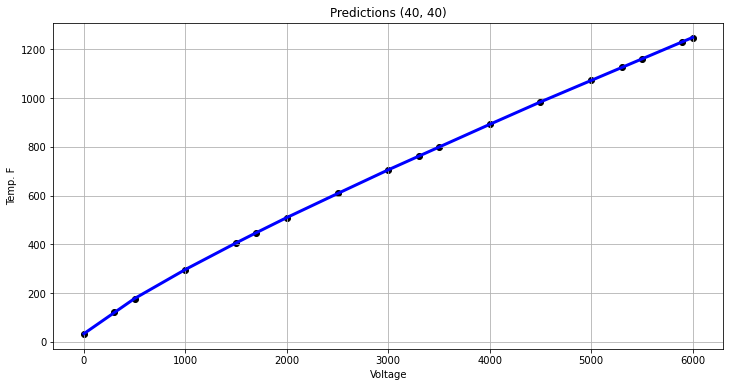

In [28]:
# MLP with Std Scaler and more neurons!
def try_MLP(X_in, hidden_layer_sizes=(5,2), title='Predictions'):
  # Just take these out and drop in MLPRegressor!
  global regr
  #regr = linear_model.LinearRegression()
  #regr.fit(X_in, Y)
  #regr = DecisionTreeRegressor(max_depth=try_max_depth)
  #regr.fit(X_in, Y)
  regr = MLPRegressor(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=hidden_layer_sizes,
                     random_state=1)
  regr.fit(X_in, Y.reshape(N,)) # MLP doesn't like Y as a column vector

  # Add the reshape since decision tree outputs 18,1 otherwise
  Y_pred = regr.predict(X_in).reshape(N,1)
  print(f"Mean squared error: {mean_squared_error(Y, Y_pred):.2f}")
  print(f"Mean absolute error: {mean_absolute_error(Y, Y_pred):.2f}")
  print(f"Mean absolute percentage error: {mean_absolute_percentage_error(Y, Y_pred):.2f}")

  # Put error in pandas so we can use .describe()
  e = pd.DataFrame(Y_pred-Y, columns=['deltaT_F'])
  print(e.describe())
  # Probably not very good performance!

  # Plot original and predicted
  plt.figure(figsize=(12,6))
  plt.scatter(X, Y, color="black")
  plt.plot(X, Y_pred, color="blue", linewidth=3)
  plt.title(title)
  plt.xlabel('Voltage')
  plt.ylabel('Temp. F')
  plt.grid()
  plt.show()

# Hyperparameter experiments: just hidden layers
hidden_layer_size_trials = [
    (7,4),
    (8,5),
    (12,6),
    (20,20),
    (40,40),
]

for hidden_layer_sizes in hidden_layer_size_trials:
  try_MLP(X_std, hidden_layer_sizes=hidden_layer_sizes, title=f"Predictions {hidden_layer_sizes}")

# Last one looks good but did not converge!!
#reg = MLPRegressor(solver='adam', alpha=1e-5, activation='relu', max_iter=10000,
#                     hidden_layer_sizes=(40, 40), random_state=1)
# Hyperparameters....
# layer_sizes activation MSE
# 5,3     relu 8.77
# 7,4     relu 590.76
# 8,4     relu 15000
# 10,4    relu 43
# 20,20   relu 2.87
# 40,40   relu 0.8 max_iter=200
# 40,40   relu 0.08 max_iter=10000
# 40,40   identity Takes us back to LinearRegression!!
# 40,40   logistic No converge zig-zag prediction
# 20,20   logistic No converge WORSE zig-zag prediction
# 40,40 adam relu 10000 MSE=10.... and so on!


Mean squared error: 590.76
Mean absolute error: 9.75
Mean absolute percentage error: 0.16
        deltaT_F
count  18.000000
mean    0.000312
std    25.010135
min   -65.866006
25%    -1.347543
50%    -0.127274
75%     1.203915
max    78.133994


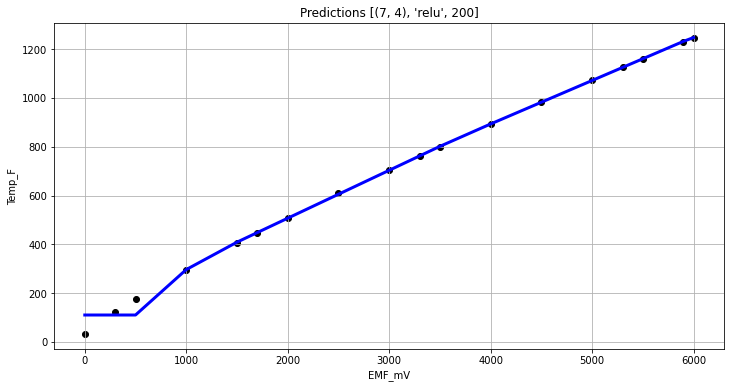

Mean squared error: 0.27
Mean absolute error: 0.44
Mean absolute percentage error: 0.00
        deltaT_F
count  18.000000
mean    0.019956
std     0.531374
min    -0.759697
25%    -0.483510
50%     0.051618
75%     0.398594
max     0.933564


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


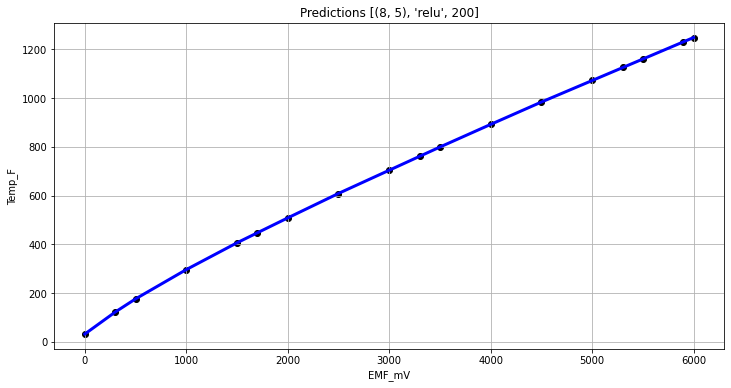

Mean squared error: 581.58
Mean absolute error: 17.88
Mean absolute percentage error: 0.17
        deltaT_F
count  18.000000
mean    4.336219
std    24.410634
min   -18.260466
25%   -14.456193
50%    -2.069251
75%    16.051680
max    73.742568


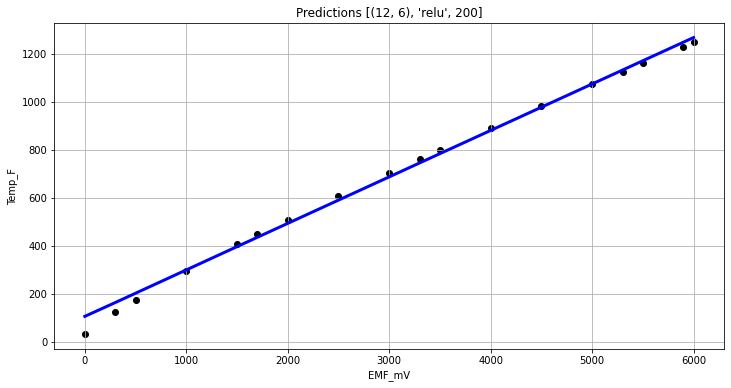

Mean squared error: 2.87
Mean absolute error: 1.37
Mean absolute percentage error: 0.00
        deltaT_F
count  18.000000
mean   -0.000026
std     1.741978
min    -2.751842
25%    -1.570272
50%    -0.000266
75%     1.587719
max     2.864538


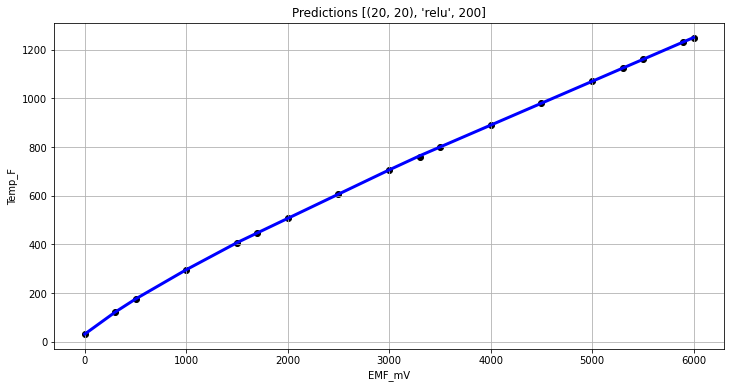

Mean squared error: 526.05
Mean absolute error: 19.65
Mean absolute percentage error: 0.14
        deltaT_F
count  18.000000
mean   -0.000002
std    23.600668
min   -24.787331
25%   -19.883271
50%    -6.816562
75%    13.907987
max    58.905076


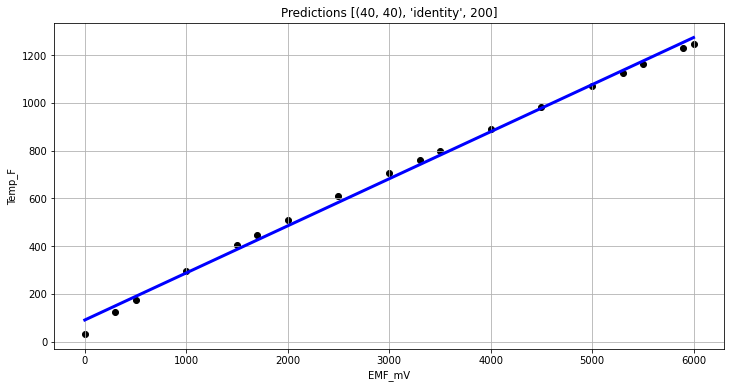

Mean squared error: 1491.19
Mean absolute error: 20.89
Mean absolute percentage error: 0.02
        deltaT_F
count  18.000000
mean    0.001107
std    39.735443
min   -91.681432
25%    -0.037395
50%    -0.000321
75%     0.010499
max    92.318568


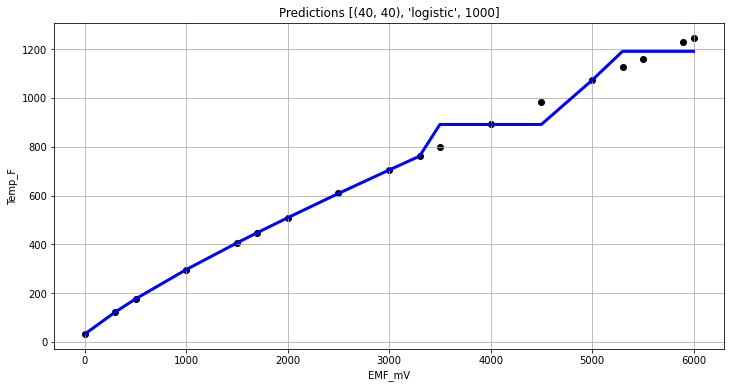

Mean squared error: 0.08
Mean absolute error: 0.18
Mean absolute percentage error: 0.00
        deltaT_F
count  18.000000
mean    0.000399
std     0.295719
min    -0.799743
25%    -0.014884
50%     0.005964
75%     0.044985
max     0.555570


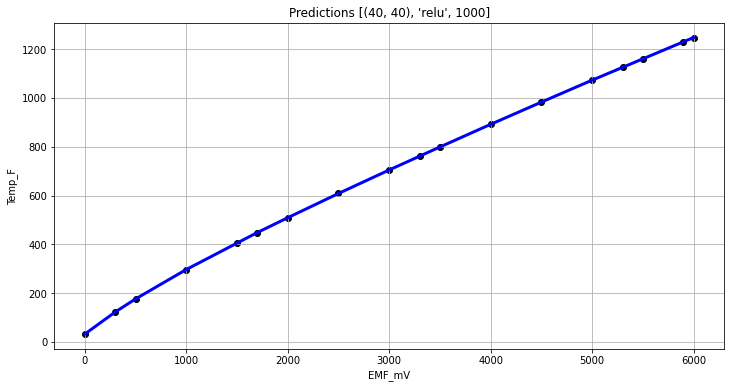

Mean squared error: 0.08
Mean absolute error: 0.18
Mean absolute percentage error: 0.00
        deltaT_F
count  18.000000
mean    0.000399
std     0.295719
min    -0.799743
25%    -0.014884
50%     0.005964
75%     0.044985
max     0.555570


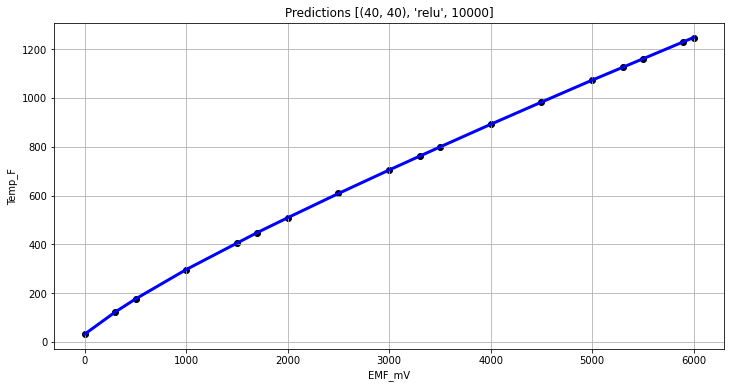

In [34]:
# MLP with Std Scaler and more neurons, more iteractions, programmable activation
def try_MLP(X_in, hidden_layer_sizes=(5,2),
            activation='relu', max_iter=-200, title='Predictions'):
  # Just take these out and drop in MLPRegressor!
  global regr
  #regr = linear_model.LinearRegression()
  #regr.fit(X_in, Y)
  #regr = DecisionTreeRegressor(max_depth=try_max_depth)
  #regr.fit(X_in, Y)
  regr = MLPRegressor(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=hidden_layer_sizes,
                     activation=activation,
                     max_iter=max_iter,
                     random_state=1)
  regr.fit(X_in, Y.reshape(N,)) # MLP doesn't like Y as a column vector

  # Add the reshape since decision tree outputs 18,1 otherwise
  Y_pred = regr.predict(X_in).reshape(N,1)
  print(f"Mean squared error: {mean_squared_error(Y, Y_pred):.2f}")
  print(f"Mean absolute error: {mean_absolute_error(Y, Y_pred):.2f}")
  print(f"Mean absolute percentage error: {mean_absolute_percentage_error(Y, Y_pred):.2f}")

  # Put error in pandas so we can use .describe()
  e = pd.DataFrame(Y_pred-Y, columns=['deltaT_F'])
  print(e.describe())
  # Probably not very good performance!

  # Plot original and predicted
  plt.figure(figsize=(12,6))
  plt.scatter(X, Y, color="black")
  plt.plot(X, Y_pred, color="blue", linewidth=3)
  plt.title(title)
  plt.xlabel('EMF_mV')
  plt.ylabel('Temp_F')
  plt.grid()
  plt.show()

# Hyperparameter experiments: just hidden layers
hyperparameter_trials = [
    [(7,4),'relu',200],
    [(8,5),'relu',200],
    [(12,6),'relu',200],
    [(20,20),'relu',200],
    [(40,40),'identity',200],
    [(40,40),'logistic',1000],
    [(40,40),'relu',1000],
    [(40,40),'relu',10000],
]

for hyperparam in hyperparameter_trials:
  try_MLP(X_std, hidden_layer_sizes=hyperparam[0], activation=hyperparam[1], max_iter=hyperparam[2], title=f"Predictions {hyperparam}")


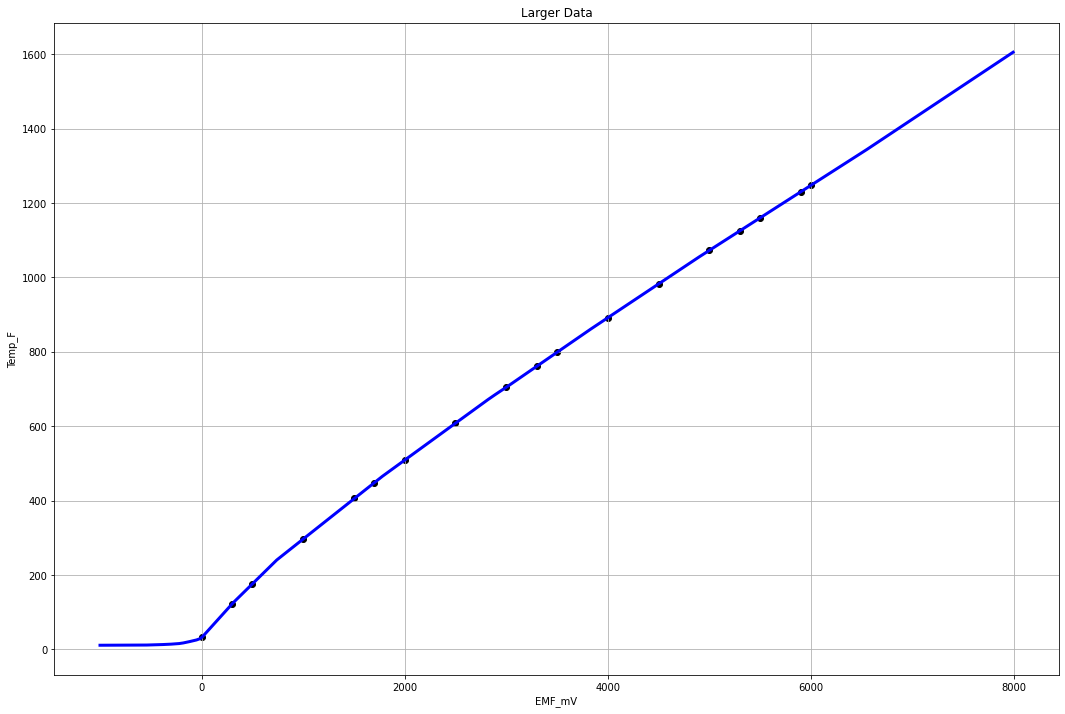

In [43]:
# Put lots of data against the MLP- this generalizes much better than the Decision Tree
X2 = np.arange(-1000, 8000, 10, dtype=float).reshape(-1,1)
X2_std=std_scaler.transform(X2)

Y_pred = regr.predict(X2_std).reshape(-1,1)

# Plot outputs
plt.figure(figsize=(18,12))
plt.scatter(X, Y, color="black")
plt.plot(X2, Y_pred, color="blue", linewidth=3)
plt.title('Larger Data')
plt.xlabel('EMF_mV')
plt.ylabel('Temp_F')
plt.grid()
plt.show()


plt.show()
